<a href="https://colab.research.google.com/github/gon-olmedo/data-science-cookbook/blob/main/Times_Series_Forecasting/01_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# We import the quarterly EPS in US dollars (USD) of Johnson & Johnson (NYSE:JNJ)
# from 1960 to 1980. Our goal is to use the data from 1960 to the end of 1979
# to predict the four quarters of 1980

file = 'https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/master/data/jj.csv'

df = pd.read_csv(file)

df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [3]:
# we will split the data between train and testing.
# Data is already sorted so we can use index slicing

train = df[:-4] # everything but last 4 rows
test = df[-4:] # take las 4 rows only

In [4]:
# We will use the arithmetic mean

historical_mean = np.mean(train['data'])
historical_mean

4.308499987499999

In [5]:
# We will naively add a new column to the test data set
# containing the previous computed mean

(test.insert(
    loc=test.shape[1],
    column='pred_mean', 
    value=historical_mean)
)

test

,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


We will use the Mean Absolute Percetage Error to evaluate the performance of our forecast

$MAPE = \frac{1}{n} \underset{i=1}{\overset{n}{\sum}} |\frac{A_i - F_i}{A_i}| \times100$

In [6]:
# we will implement aboe function in Python:

def mape(y_true, y_pred):
  return (np.mean(
      np.abs((y_true - y_pred) / y_true)) * 100
  )

In [7]:
mape_hist_mean = mape(test['data'], test['pred_mean'])

mape_hist_mean

70.00752579965119

## Visualizing our Forecast

### Matplotlib

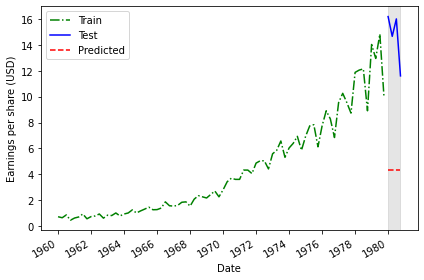

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)
 
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
 
fig.autofmt_xdate()
plt.tight_layout()

### Plotly

In [9]:
import plotly.express as px

In [10]:
# prepare test data for concat
test_prepared = pd.melt(test, id_vars='date', value_vars=['data', 'pred_mean'])

map = {'data': 'Test', 'pred_mean': 'Predicted'}

test_prepared['variable'] = test_prepared['variable'].map(map)

test_prepared.head()

,date,variable,value
0,1980-01-01,Test,16.2000
1,1980-04-01,Test,14.6700
2,1980-07-02,Test,16.0200
3,1980-10-01,Test,11.6100
4,1980-01-01,Predicted,4.3085


In [11]:
# prepare train data for concat
train_prepared = train.rename(columns={'data': 'value'})

train_prepared.insert(loc=train_prepared.shape[1], column='variable', value='train')

train_prepared.head()

,date,value,variable
0,1960-01-01,0.71,train
1,1960-04-01,0.63,train
2,1960-07-02,0.85,train
3,1960-10-01,0.44,train
4,1961-01-01,0.61,train


In [12]:
data = pd.concat([train_prepared, test_prepared], axis=0)

# chart
fig = px.line(data, x = 'date', y = 'value', color='variable',
              labels= {'date':'Date','value':'Earnings per share (USD)'},
              title= 'EPS in US dollars (USD) of Johnson & Johnson (NYSE:JNJ) from 1960 to 1980 + Prediction')

# add vertical rectangle to highlight prediction period
fig.add_vrect(x0=test['date'].min(), x1=test['date'].max(), line_width=0, fillcolor="grey", opacity=0.2)

# defautl tickmark was every 5 years, we update it to be more frequent
fig.update_xaxes(nticks=int(data['date'].nunique()/4))

fig.show()